In [52]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 100;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 30
cphl = CPHL.CPHLSolver(N_sites, g_vals);
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)

100-element Vector{Float64}:
  0.14500168752695802
  0.2929432070731879
  0.4439259676217468
  0.5980565101842448
  0.755446855133116
  0.9162148790967917
  1.0804836878056316
  1.2483887475504378
  1.4200633554536406
  1.5956553754114995
  1.7753193370232165
  1.9592188716743364
  2.1475274525984958
  ⋮
 28.85403282404775
 28.880135815438873
 28.90315965361627
 28.923293873370227
 28.94071485251587
 28.955586902398927
 28.968063239040404
 28.978286869295037
 28.986391391721718
 28.99250172352925
 28.996734761530128
 28.999199984061818

In [53]:

@load "DATA/ALPHAMat_$(5).jld2" ALPHAMat

cphl.ALPHAMat = ALPHAMat
CPHL.SetUpHamiltonians(cphl);


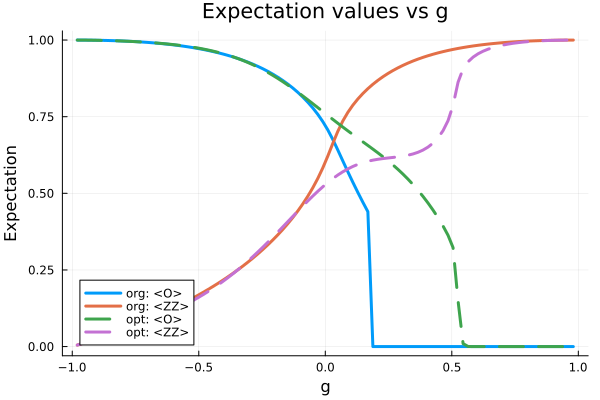

In [54]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)

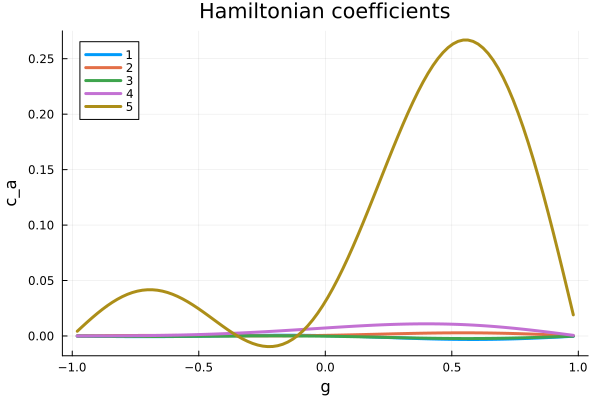

In [55]:
l = plot(cphl.g_vals, cphl.CMat[:, 1], label="$(1)", title="Hamiltonian coefficients", xlabel="g", ylabel="c_a", linewidth=3);
for idx in 2:cphl.N_op
    plot!(l, cphl.g_vals, cphl.CMat[:, idx], label="$(idx)", linewidth=3)
end


display(l)